# Лабораторна робота №7

**Тема**: Дослідження та візуалізація даних за допомогою Pandas 

**Мета**: отримати базові навики використання Pandas для дослідження та візуалізації даних.

In [2]:
print(f"Варіант {ord("P") % 3 + 1}")

Варіант 3


## Постановка задачі:

1. Знайдіть добові втрати БТР.
2. Знайдіть 5 найбільших добових втрат БТР і визначте дати.
3. Визначте, скільки БТР було знищено влітку 2024 року.
4. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
5. Створіть графік втрат БТР та особового складу за останні 200 днів (починаючи з останньої дати в наборі даних)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("russia_losses_equipment.csv")
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-11-23,1369,428,347,11363,23615,34585,1549,NaN,NaN,83338,28,1248,4003.0,NaN,NaN,67922.0,3940.0,1.0
1,2025-11-22,1368,428,347,11361,23607,34559,1547,NaN,NaN,82842,28,1248,4002.0,NaN,NaN,67842.0,3940.0,1.0
2,2025-11-21,1367,428,347,11357,23600,34550,1546,NaN,NaN,82620,28,1247,4002.0,NaN,NaN,67768.0,3940.0,1.0
3,2025-11-20,1366,428,347,11357,23597,34530,1546,NaN,NaN,82470,28,1247,4002.0,NaN,NaN,67703.0,3940.0,1.0
4,2025-11-19,1365,428,347,11356,23595,34511,1546,NaN,NaN,82086,28,1247,4001.0,NaN,NaN,67635.0,3940.0,1.0


## Завдання 1

Знайти добові втрати БТР

In [ ]:
daily = df[["date","APC"]].copy()
daily = daily.iloc[::-1]
daily["APC"] = daily["APC"].diff().fillna(daily['APC'])
daily = daily.iloc[::-1]
daily

## Завдання 2

Знайдіть 5 найбільших добових втрат БТР і визначте дати.

In [7]:
daily = df[["date","APC"]].copy()
daily = daily.iloc[::-1]
daily["APC"] = daily["APC"].diff().fillna(daily['APC'])
daily = daily.iloc[::-1]
daily = daily.sort_values("APC", ascending=False)
daily.head()


,date,APC
1367,2022-02-25,516.0
1366,2022-02-26,190.0
765,2023-10-20,120.0
1364,2022-02-28,110.0
1348,2022-03-16,96.0


## Завдання 3

Визначте, скільки БТР було знищено влітку 2024 року.

In [8]:
print((df[df["date"] == "2024-08-31"]["APC"].values - df[df["date"] == "2024-06-01"]["APC"].values)[0])

1789


## Завдання 4

Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [9]:
avg = df.copy()[::-1]
print(avg.iloc[100:500:]["APC"].mean())

5817.675


## Завдання 5 

Створіть графік втрат БТР та особового складу за останні 200 днів (починаючи з останньої дати в наборі даних)

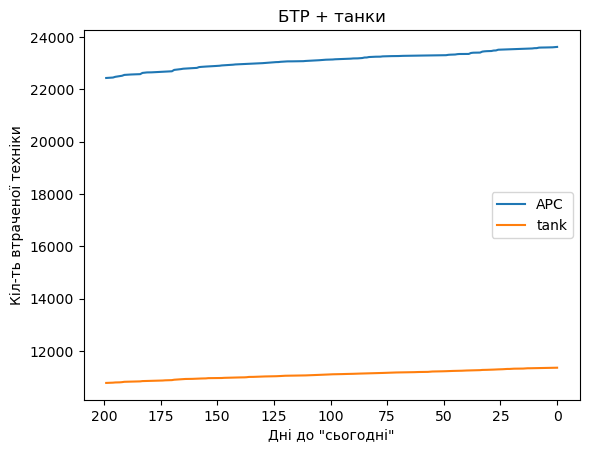

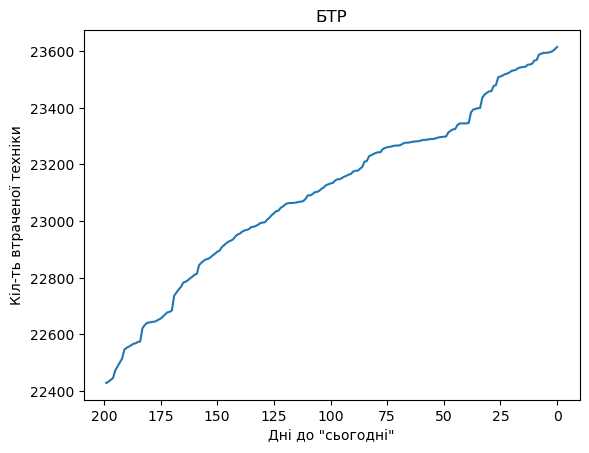

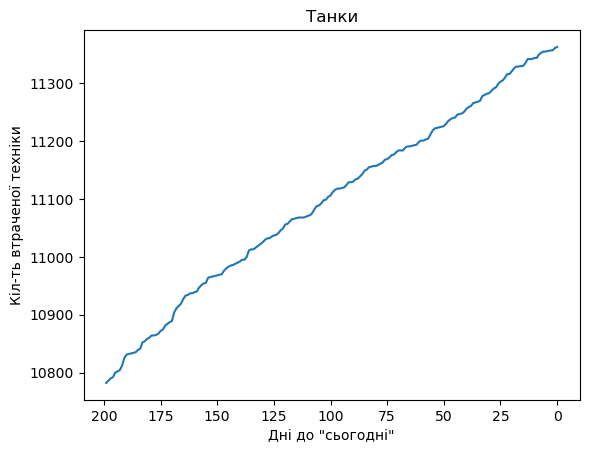

In [11]:
APC_tank = df.iloc[:200][["APC", "tank"]]
APC_tank.plot()
plt.xlabel("Дні до \"сьогодні\"")
plt.ylabel("Кіл-ть втраченої техніки")
plt.title("БТР + танки")
plt.gca().invert_xaxis()
plt.show()

APC = df.iloc[:200]["APC"]
APC.plot()
plt.xlabel("Дні до \"сьогодні\"")
plt.ylabel("Кіл-ть втраченої техніки")
plt.title("БТР")
plt.gca().invert_xaxis()
plt.show()

tank = df.iloc[:200]["tank"]
tank.plot()
plt.xlabel("Дні до \"сьогодні\"")
plt.ylabel("Кіл-ть втраченої техніки")
plt.title("Танки")
plt.gca().invert_xaxis()
plt.show()
